In [22]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [23]:
dataset = 'model/pose_classifier/merged_data.csv'
model_save_path = 'model/pose_classifier/pose_classifier.keras'

# 分類数設定

In [24]:
NUM_CLASSES = 2

# 学習データ読み込み

In [4]:
# X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)), skiprows=1)

In [5]:
# y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0,), skiprows=1)

C:\Users\k_ino\AppData\Local\Temp\ipykernel_9872\1955746693.py:2: DeprecationWarning: loadtxt(): Parsing an integer via a float is deprecated.  To avoid this warning, you can:
    * make sure the original data is stored as integers.
    * use the `converters=` keyword argument.  If you only use
      NumPy 1.23 or later, `converters=float` will normally work.
    * Use `np.loadtxt(...).astype(np.int64)` parsing the file as
      floating point and then convert it.  (On all NumPy versions.)
  (Deprecated NumPy 1.23)
  y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0,), skiprows=1)


In [25]:
data = np.loadtxt(dataset, delimiter=',', dtype='float32', skiprows=1)

# データ部分（全ての列から最後の列を除く）
X_dataset = data[:, 1:-1]

# ラベル部分（最後の列）
y_dataset = data[:, -1].astype(np.int32)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.8, random_state=RANDOM_SEED)

# モデル構築

In [27]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Input((113, )),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(20, activation='relu'),
#     tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Dense(10, activation='relu'),
#     tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
# ])

model = tf.keras.models.Sequential([
    tf.keras.layers.Input((113, )),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [28]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dropout_3 (Dropout)                  │ (None, 113)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │              22 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,272 (4.97 KB)

 Trainable params: 1,272 (4.97 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [30]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [31]:
model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/10
 1/51 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.3125 - loss: 1.4156
Epoch 1: saving model to model/pose_classifier/pose_classifier.keras
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3614 - loss: 0.9744 - val_accuracy: 0.5221 - val_loss: 0.4975
Epoch 2/10
 1/51 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5312 - loss: 0.6071
Epoch 2: saving model to model/pose_classifier/pose_classifier.keras
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6108 - loss: 0.5750 - val_accuracy: 1.0000 - val_loss: 0.3633
Epoch 3/10
 1/51 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7812 - loss: 0.5026
Epoch 3: saving model to model/pose_classifier/pose_classifier.keras
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8442 - loss: 0.4489 - val_accuracy: 1.0000 - val_loss: 0.2827
Epoch 4/10
 1/51 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9062 - loss: 0.3195
Epoch 4: saving model to model/pose_classifier/pose_classifier.keras
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

In [32]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0022 


In [33]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [34]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[3.5953304e-05 9.9996400e-01]
1


# 混同行列

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


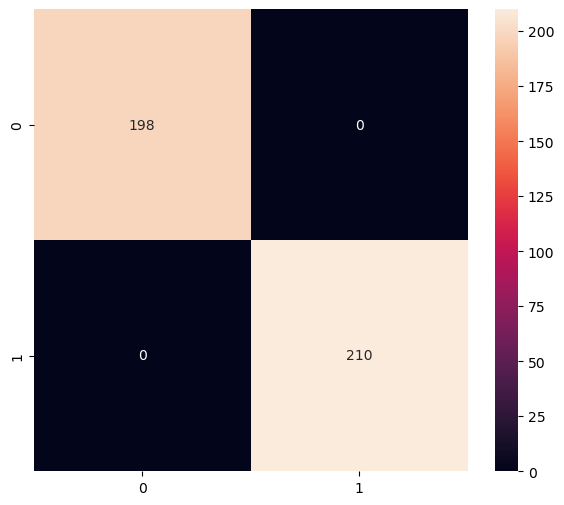

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       198
           1       1.00      1.00      1.00       210

    accuracy                           1.00       408
   macro avg       1.00      1.00      1.00       408
weighted avg       1.00      1.00      1.00       408



In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [34]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [ ]:
# モデルを変換(量子化)
tflite_save_path = 'model/pose_classifier/pose_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\k_ino\AppData\Local\Temp\tmptswhm9qx\assets


INFO:tensorflow:Assets written to: C:\Users\k_ino\AppData\Local\Temp\tmptswhm9qx\assets


# 推論テスト

In [37]:
interpreter = tf.lite.Interpreter(model_path=model_save_path) #tflite
interpreter.allocate_tensors()

AttributeError: module 'tensorflow' has no attribute 'Interpreter'

In [ ]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [ ]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

In [ ]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))